In [26]:
import pandas

In [27]:
trips = pandas.read_excel('trips_data.xlsx')

In [28]:
trips.head()

,Unnamed: 0,salary,city,age,vacation_preference,transport_preference,family_members,target
0,0,196000,Краснодар,25,Шоппинг,Автомобиль,1,New York
1,1,152000,Екатеринбург,60,Архитектура,Самолет,1,London
2,2,83000,Томск,49,Архитектура,Автомобиль,2,Sydney
3,3,161000,Краснодар,41,Шоппинг,Автомобиль,0,New York
4,4,146000,Краснодар,58,Архитектура,Самолет,1,Sydney


In [29]:
trips.describe()

,Unnamed: 0,salary,age,family_members
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,111935.000000,55.209000,1.295000
std,288.819436,54580.049073,11.925164,0.885867
min,0.000000,0.000000,18.000000,0.000000
25%,249.750000,68000.000000,50.000000,1.000000
50%,499.500000,99000.000000,58.000000,1.000000
75%,749.250000,161000.000000,63.000000,2.000000
max,999.000000,250000.000000,82.000000,4.000000


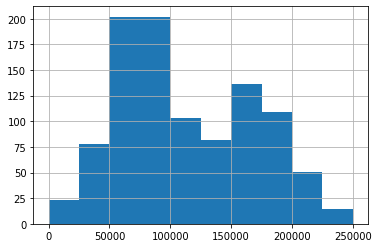

In [30]:
trips.salary.hist()

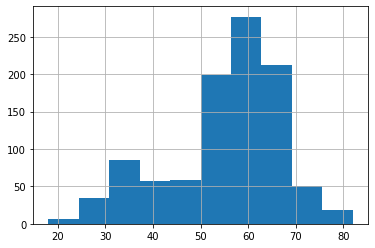

In [31]:
trips.age.hist()

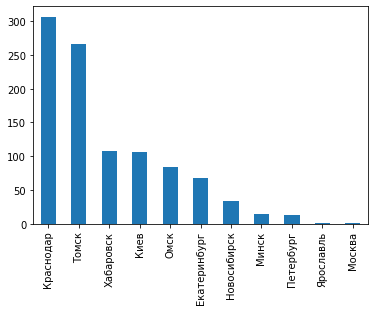

In [32]:
trips.city.value_counts().plot(kind='bar')

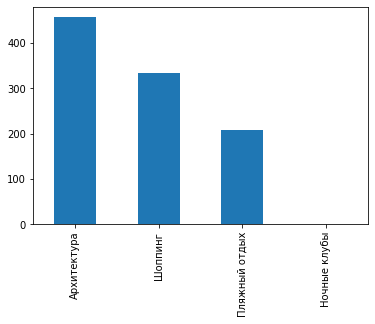

In [33]:
trips.vacation_preference.value_counts().plot(kind='bar')

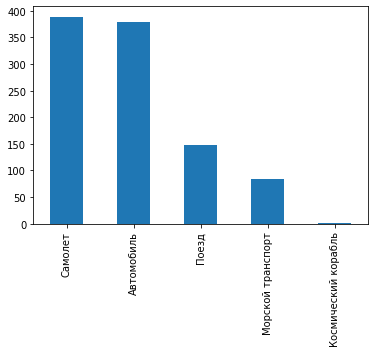

In [34]:
trips.transport_preference.value_counts().plot(kind='bar')

In [35]:
trips.head()

,Unnamed: 0,salary,city,age,vacation_preference,transport_preference,family_members,target
0,0,196000,Краснодар,25,Шоппинг,Автомобиль,1,New York
1,1,152000,Екатеринбург,60,Архитектура,Самолет,1,London
2,2,83000,Томск,49,Архитектура,Автомобиль,2,Sydney
3,3,161000,Краснодар,41,Шоппинг,Автомобиль,0,New York
4,4,146000,Краснодар,58,Архитектура,Самолет,1,Sydney


In [36]:
trips_updated = pandas.get_dummies(trips, columns=['city', 'vacation_preference', 'transport_preference'])

In [37]:
input_data = trips_updated.drop('target', axis = 1) #входные данные
target = trips_updated.target #что мы предсказываем

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
model = RandomForestClassifier()

In [40]:
model.fit(input_data, target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
model.feature_importances_

array([8.98901955e-02, 1.99298689e-01, 1.68984693e-01, 1.55689122e-01,
       1.50305530e-02, 1.35180351e-02, 2.11285515e-02, 2.99891927e-03,
       6.14682632e-05, 5.84202753e-03, 1.19163173e-02, 1.09339176e-03,
       2.01905580e-02, 1.15638124e-02, 4.09569604e-04, 3.02899500e-02,
       1.80802204e-04, 3.43394918e-02, 6.75055947e-02, 4.19213160e-02,
       8.97558747e-05, 1.93089002e-02, 2.82833808e-02, 6.04649056e-02])

In [43]:
{col: 0 for col in input_data.columns}

{'Unnamed: 0': 0,
 'salary': 0,
 'age': 0,
 'family_members': 0,
 'city_Екатеринбург': 0,
 'city_Киев': 0,
 'city_Краснодар': 0,
 'city_Минск': 0,
 'city_Москва': 0,
 'city_Новосибирск': 0,
 'city_Омск': 0,
 'city_Петербург': 0,
 'city_Томск': 0,
 'city_Хабаровск': 0,
 'city_Ярославль': 0,
 'vacation_preference_Архитектура': 0,
 'vacation_preference_Ночные клубы': 0,
 'vacation_preference_Пляжный отдых': 0,
 'vacation_preference_Шоппинг': 0,
 'transport_preference_Автомобиль': 0,
 'transport_preference_Космический корабль': 0,
 'transport_preference_Морской транспорт': 0,
 'transport_preference_Поезд': 0,
 'transport_preference_Самолет': 0}

In [50]:
my_example = {'Unnamed: 0': 0,
 'salary': 70000,
 'age': 39,
 'family_members': 2,
 'city_Екатеринбург': 0,
 'city_Киев': 0,
 'city_Краснодар': 1,
 'city_Минск': 0,
 'city_Москва': 0,
 'city_Новосибирск': 0,
 'city_Омск': 0,
 'city_Петербург': 0,
 'city_Томск': 0,
 'city_Хабаровск': 0,
 'city_Ярославль': 0,
 'vacation_preference_Архитектура': 1,
 'vacation_preference_Ночные клубы': 0,
 'vacation_preference_Пляжный отдых': 0,
 'vacation_preference_Шоппинг': 0,
 'transport_preference_Автомобиль': 0,
 'transport_preference_Космический корабль': 0,
 'transport_preference_Морской транспорт': 0,
 'transport_preference_Поезд': 0,
 'transport_preference_Самолет': 1}

In [51]:
my_example_dataFrame = pandas.DataFrame(data = [my_example])

In [52]:
model.predict(my_example_dataFrame)

array(['Paris'], dtype=object)